# Autoreload

In [1]:
%reload_ext autoreload
%autoreload 2

# Load libraries and packages

In [3]:
import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Utility functions

In [4]:
from utils import clean_text, DenseTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Import data

In [7]:

dt = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=["reviews", "rating"])
dt.head(4)

,reviews,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0


# Create labels using lambda

In [8]:
dt['labels'] = dt["rating"].apply(lambda x: "Positive" if x else "Negative")
dt.head(4)

,reviews,rating,labels
0,"A very, very, very slow-moving, aimless movie ...",0,Negative
1,Not sure who was more lost - the flat characte...,0,Negative
2,Attempting artiness with black & white and cle...,0,Negative
3,Very little music or anything to speak of.,0,Negative


In [9]:
dt.isna().sum()


reviews    0
rating     0
dtype: int64

1    386
0    362
Name: rating, dtype: int64



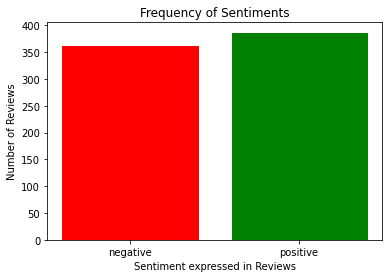

In [52]:

Index = [1, 0]

print(dt["rating"].value_counts())
print()

barlist = plt.bar(Index, dt["rating"].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['positive', 'negative'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[1]].set_color('green')
barlist[Index[0]].set_color('red')
plt.show()

# Apply clean_text function from module utils

In [13]:
dt['clean_review'] = dt['reviews'].apply(clean_text)


In [14]:
dt['length'] = dt['reviews'].apply(lambda x: len(str(x).split(' ')))
dt.head(4)

,reviews,rating,labels,clean_review,length
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,a very very very slowmoving aimless movie abou...,15
1,Not sure who was more lost - the flat characte...,0,Negative,not sure who wa more lost the flat character o...,21
2,Attempting artiness with black & white and cle...,0,Negative,attempting artiness with black white and cleve...,33
3,Very little music or anything to speak of.,0,Negative,very little music or anything to speak of,10


# Check the unique figure of the word document

In [15]:
dt['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800],
      dtype=int64)

# Visualisation of the figure

<BarContainer object of 55 artists>

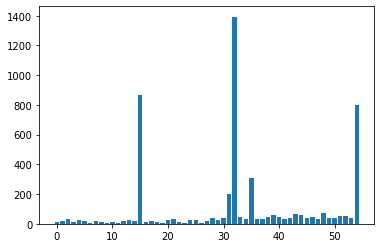

In [16]:

unique_lengths = dt['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

# Data preprocessing under count_vectorizer treatment under GaussianNB

In [27]:

cv_nb = CountVectorizer(stop_words='english')
count_data = cv_nb.fit_transform(dt["clean_review"])
cv_dataframe = pd.DataFrame(count_data.toarray(), columns=cv_nb.get_feature_names())

cv_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preprocessing under tfidf_vectorizer treatment under GaussianNB

In [29]:
tfidf_nb = CountVectorizer(stop_words='english')
count_data = tfidf_nb.fit_transform(dt["clean_review"])
cv_dataframe = pd.DataFrame(count_data.toarray(), columns=tfidf_nb.get_feature_names())

cv_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x = dt['reviews']
y = dt['rating']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .40, random_state = 60)


In [33]:
print(f"train shape input:{x_train.shape}, output:{y_train.shape}")
print(f"test shape  input:{x_test.shape}, output:{y_test.shape}")

train shape input:(448,), output:(448,)
test shape  input:(300,), output:(300,)


# Fit our data into the count vectorizer and GaussianNB

In [34]:
cv_nb = Pipeline([
    ('bow', CountVectorizer(stop_words="english")),
    ("dense", DenseTransformer()),
    ('classifier', GaussianNB())
])

In [35]:
cv_nb.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(stop_words='english')),
                ('dense', DenseTransformer()), ('classifier', GaussianNB())])

In [37]:
joblib.dump(cv_nb, "models/gaussian_naive_bayes_with_count_vectorizer.joblib")


['models/gaussian_naive_bayes_with_count_vectorizer.joblib']

# predict testing data

In [39]:
y_pred = cv_nb.predict(x_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       155
           1       0.73      0.60      0.66       145

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



# Running Cross validation with Countvectorizer and GaussianNB

In [40]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    cv_nb.fit(x_train_fold, y_train_fold)
    result = cv_nb.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.6800
  2. 0.6133
  3. 0.6667
  4. 0.6267
  5. 0.6667
  6. 0.6133
  7. 0.5733
  8. 0.6533
  9. 0.5541
 10. 0.7162

Metrics that were obtained from this model:
 Maximum Accuracy:   71.62%
 Minimum Accuracy:   55.41%
 Mean Accuracy:   63.64%
 Standard Deviation: 0.0472


# Train with TfidfVector and NB

In [41]:
tfidf_nb = Pipeline([
    ('bow', TfidfVectorizer(stop_words="english")),
    ("dense", DenseTransformer()),
    ('classifier', GaussianNB())
])

In [45]:
tfidf_nb.fit(x_train, y_train)

Pipeline(steps=[('bow', TfidfVectorizer(stop_words='english')),
                ('dense', DenseTransformer()), ('classifier', GaussianNB())])

In [46]:
joblib.dump(tfidf_nb, "models/gaussian_naive_bayes_with_tfidf_vectorizer.joblib")


['models/gaussian_naive_bayes_with_tfidf_vectorizer.joblib']

# predict testing data

In [48]:
model_pred = tfidf_nb.predict(x_test) 

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       155
           1       0.68      0.63      0.65       145

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



# Running Cross validation with TfidfvVectorizer and GaussianNB

In [49]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    tfidf_nb.fit(x_train_fold, y_train_fold)
    result = tfidf_nb.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.7467
  2. 0.6533
  3. 0.6933
  4. 0.6800
  5. 0.7067
  6. 0.6533
  7. 0.6267
  8. 0.6800
  9. 0.6622
 10. 0.7703

Metrics that were obtained from this model:
 Maximum Accuracy:   77.03%
 Minimum Accuracy:   62.67%
 Mean Accuracy:   68.72%
 Standard Deviation: 0.0419
